In [104]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score

In [105]:
df = pd.read_csv("dataset_23_cmc.csv")
df

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wifes_age                     1473 non-null   int64
 1   Wifes_education               1473 non-null   int64
 2   Husbands_education            1473 non-null   int64
 3   Number_of_children_ever_born  1473 non-null   int64
 4   Wifes_religion                1473 non-null   int64
 5   Wifes_now_working%3F          1473 non-null   int64
 6   Husbands_occupation           1473 non-null   int64
 7   Standard-of-living_index      1473 non-null   int64
 8   Media_exposure                1473 non-null   int64
 9   Contraceptive_method_used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [107]:
target = "Contraceptive_method_used"

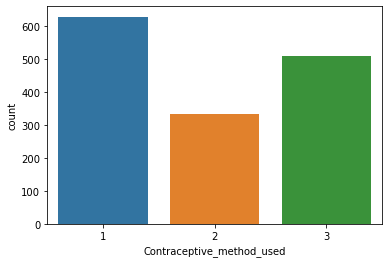

In [108]:
sns.countplot(x = df[target]);


In [109]:
sample_max = df[df[target] == 2].shape[0]
df_aux = pd.DataFrame()
df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==2)].sample(n=sample_max, random_state = 1).index]])
df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==1)].sample(n=sample_max, random_state = 1).index]])
df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==3)].sample(n=sample_max, random_state = 1).index]])
df = df_aux

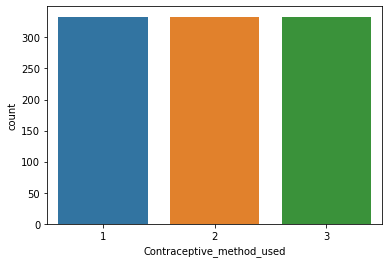

In [110]:
sns.countplot(x = df[target]);

**Normalização entre 0 - 1**

In [95]:
#normlizando 0 - 1
normalized_df = pd.DataFrame()
for i in df.columns:
    if i != target:
        normalized_df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())
    else:
        normalized_df[i] = df[i]
        
normalized_df

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
474,0.939394,1.000000,1.000000,0.5000,1.0,1.0,0.000000,1.000000,0.0,2
1256,0.939394,1.000000,1.000000,0.2500,0.0,1.0,0.333333,1.000000,0.0,2
595,0.787879,1.000000,1.000000,0.3125,1.0,1.0,0.000000,1.000000,0.0,2
607,0.515152,0.666667,1.000000,0.1875,0.0,1.0,0.333333,1.000000,0.0,2
1272,0.393939,1.000000,1.000000,0.1875,1.0,1.0,0.666667,0.333333,0.0,2
...,...,...,...,...,...,...,...,...,...,...
758,0.969697,0.666667,1.000000,0.1875,1.0,1.0,0.333333,0.666667,0.0,3
854,0.393939,0.666667,0.666667,0.3750,1.0,1.0,0.666667,0.666667,0.0,3
1424,0.181818,0.333333,1.000000,0.1250,1.0,1.0,0.666667,0.333333,0.0,3
1399,0.151515,0.666667,0.666667,0.0625,1.0,1.0,0.666667,0.000000,0.0,3


**Usar o dataset Categorico no Nayves Bayse**

**Sem balanceamento e Sem GS**

In [111]:
def classificador(model,X_train, X_test,y_train, y_test):
    
    results = pd.DataFrame(columns=["ACC","F1"])
    model.fit(X_train, y_train)
    #utilizando acuracia balanceada
    new_row = {"ACC":balanced_accuracy_score(y_test, model.predict(X_test)),"F1":f1_score(y_test, model.predict(X_test), average='weighted') }




    return new_row

In [112]:
X = normalized_df.drop(target, axis=1).values
y = normalized_df[target].values
splits_kfold = 5

In [113]:

kf = StratifiedKFold(n_splits=splits_kfold)
kf.get_n_splits(X,y)

metrics = ["ACC","F1"]

df_knn = pd.DataFrame(columns=metrics)
df_tree = pd.DataFrame(columns=metrics)
df_mlp = pd.DataFrame(columns=metrics)
df_nb = pd.DataFrame(columns=metrics)
df_reg_log = pd.DataFrame(columns=metrics)



for train_index, test_index in kf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    model = KNeighborsClassifier(n_neighbors=7)
    df_knn =df_knn.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True)
    
     
    model = DecisionTreeClassifier()
    df_tree = df_tree.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True)
    
    
    
    model = MLPClassifier(hidden_layer_sizes=(64,64,64), 
                    activation='tanh', solver='sgd',
                    alpha=0.0001,
                    learning_rate='adaptive', max_iter=1000)
    df_mlp  = df_mlp.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True)
    
    
    
    model = GaussianNB()
    df_nb = df_nb.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True) 
    
    
    
    model = LogisticRegression(solver='liblinear')
    df_reg_log = df_reg_log.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True) 
    

In [114]:
df_knn

,ACC,F1
0,0.454847,0.455043
1,0.444595,0.436466
2,0.500000,0.495868
3,0.435173,0.435157
4,0.532715,0.531263


In [115]:
df_tree

,ACC,F1
0,0.489748,0.487760
1,0.420473,0.415634
2,0.575230,0.574558
3,0.469772,0.470116
4,0.472034,0.471037


In [116]:
df_mlp

,ACC,F1
0,0.514850,0.513399
1,0.454847,0.453506
2,0.539650,0.538227
3,0.519825,0.520140
4,0.538067,0.533906


In [117]:
df_nb

,ACC,F1
0,0.489673,0.484407
1,0.454696,0.448449
2,0.514247,0.506071
3,0.540630,0.531404
4,0.553294,0.549108


In [118]:
df_reg_log

,ACC,F1
0,0.534675,0.533784
1,0.444897,0.441888
2,0.539801,0.539963
3,0.504900,0.505127
4,0.548017,0.543849
